# Inferential statistics II - Bootstrapping

## Introduction

In the previous frequentist mini-projects, you did frequentist calculations to perform inference from a sample of data. Such inference relies on theory largely developed from the 19th-Century onwards that is subject to certain assumptions or theoretical limits. These are fine if those assumptions hold for the particular case you're working on, and what you want to do has a known theoretical distribution (for example the mean of a sampling distribution that we looked at in the previous mini-project.)

In this mini-project, you'll use the same medical charge data you used in the frequentist inference mini-project, but this time you'll make inferences about the population using bootstrapping (ie. simulating repeated re-runs of an experiment.) If frequentism is about using assumptions and theoretical results to calculate what we expect to happen were an experiment to be run again and again and again, then bootstrapping is about using computing power to essentially re-run the sample draw again and again and again to see what actually happens.

## Prerequisites

While these exercises do not strictly depend on these concepts, we encourage you to complete the previous mini-projects before starting this one so that you can approach this assignment with a good understanding of frequentist concepts like:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

To complete mini-project, it's important that you first complete the bootstrap resources listed in this subunit, as they contain valuable information about how to calculate bootstrap replicates of summary statistics. Having an basic understanding of what confidence intervals and p-values are will also be helpful (we touch on them in this mini-project, but please speak to your mentor or conduct individual research if you'd like to learn more.) 

In [4]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [5]:
med_charges = pd.read_csv('data/insurance2.csv')

In [6]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


### 1) Bootstrap Confidence Interval

In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you'll now use bootstrap inference to verify your calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

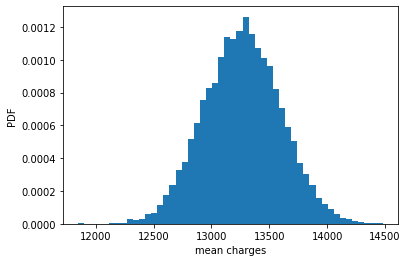

In [16]:
# write a function generates many bootstrap replicates from the data set.
def draw_bs_reps(data, func, size):
    """draw boostrap replicates."""
    # initial array of replicate 
    bs_replicates  = np.empty(size)
    # generates boostrap replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))   
    return bs_replicates
        

# draw 10000 bootsrap replicates of mean from charge data
np.random.seed(47)
bs_replicates = draw_bs_reps(med_charges.charges, np.mean, 10000)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean charges')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

bootstrap replicates we generated are display in the histogram above. To use the replicates calculate the 95% confidence interval, we will give the 5th percentile of our bootstrap replicates stored as `bs_replicates` as the 95% confidence interval lower limit.

In [28]:
# confidence interval calculation
conf_lower_limit = np.percentile(bs_replicates, 5)

print('95% confidence interval lower limit =', conf_lower_limit, 'charges')

95% confidence interval lower limit = 12724.467921704 charges


### 2) Bootstrap for Testing Equal Variance

If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__ Let's state the Null and Alternative Hypothesis first.

H_0: $std$_1 = $std$_0, the standard deviations of insurance and non-insurance claim charges are equal.
<br/><br/>
H_A:  $std$_1 ≠ $std$_0, the standard deviations of insurance and non-insurance claim charges are not equal.
<br/><br/>

In [41]:
# draw 10000 bootsrap replicates of std from charge data
np.random.seed(47)
bs_replicates_1 = draw_bs_reps(med_charges.charges[med_charges.insuranceclaim==1], np.std, 10000)
bs_replicates_0 = draw_bs_reps(med_charges.charges[med_charges.insuranceclaim==0], np.std, 10000)
bs_replicates_dif = bs_replicates_1 - bs_replicates_0

# compute 95% confidence interval for the the standard deviations of two groups
con_int_lr = round(np.percentile(bs_replicates_dif, 2.5), 2)
con_int_ur = round(np.percentile(bs_replicates_dif, 97.5), 2)
con_int_diff = [con_int_lr, con_int_ur]
print('95% Confidence Interval for Standard Deviation Difference: ', con_int_diff) 

95% Confidence Interval for Standard Deviation Difference:  [6684.31, 8500.75]


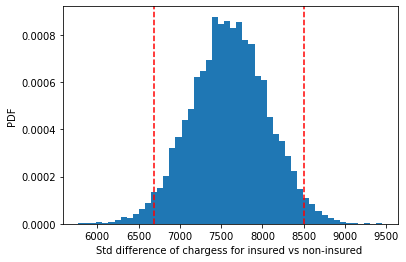

In [32]:
# Make a histogram of the results
_ = plt.hist(bs_replicates_dif, bins=50, density=True)
_ = plt.xlabel('Std difference of chargess for insured vs non-insured ')
_ = plt.axvline(con_int_lr, color = 'r', linestyle = '--')
_ = plt.axvline(con_int_ur, color = 'r', linestyle = '--')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

__Conclusion:__ From the results above, the 95% confidence interval [6684.31, 8500.75] does not included the 0, which indicates no difference of standard deviation between two groups. Hence, we reject the null hypothesis and concluded that the standard deviations of insurance and non-insurance claim charges are not equal.

## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. __To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.__

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this, this time using the bootstrap approach.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__

### 1) A two-sample bootstrap hypothesis test for difference of means ($\alpha$=0.05)

State the hypothesis.
<br/>
H_0:  $\mu$_1 =  $\mu$_0, the mean charge of insurance and non-insurance group are equal.
<br/>
H_A:  $\mu$_1 ≠  $\mu$_0, the mean charge of insurance and non-insurance group are not equal.

In [42]:
# Compute mean charges of all 
mean_charges = np.mean(med_charges.charges)

insur_1 = med_charges.charges[med_charges.insuranceclaim==1]
insur_0 = med_charges.charges[med_charges.insuranceclaim==0]

# Generate shifted arrays
insur_1_shfited =  insur_1 - np.mean(insur_1) +  mean_charges
insur_0_shfited =  insur_0 - np.mean(insur_0) +  mean_charges

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_insur_1 = draw_bs_reps(insur_1_shfited, np.mean ,10000)
bs_replicates_insur_0 = draw_bs_reps(insur_0_shfited, np.mean ,10000)

# Get replicates of difference of means: bs_replicates
bs_diff_means = bs_replicates_insur_1 - bs_replicates_insur_0
empirical_diff_means = np.mean(insur_1) - np.mean(insur_0)

# Compute and print p-value: p
p = np.sum(bs_diff_means > empirical_diff_means) / len(bs_diff_means)
print('p-value =', p)

p-value = 0.0


The P-value = 0.0 < 0.05, so we reject the null hypothesis, and we believe that mean charge of insurance and non-insurance group are not equal.

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__

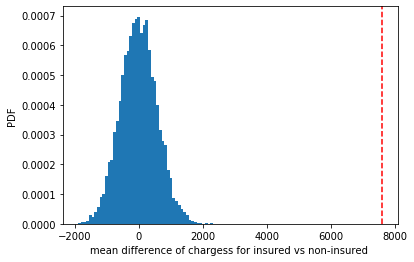

In [43]:
# Make a histogram of the results
_ = plt.hist(bs_diff_means, bins=50, density=True)
_ = plt.xlabel('mean difference of chargess for insured vs non-insured ')
_ = plt.axvline(empirical_diff_means, color = 'r', linestyle = '--')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__ Both bootstrap and $t$ statistic indicates returns small p-value.
Since we already have applied enough bootstrap sample, and according to the results above, we believe that extreme value are very unlikely to have even we increase the replicates. The plots also display how far the empirical value away from the replicates distribution under the null hypothesis.

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__ According to the results, it seems the charges of the groups with insurance are much higher, since the difference is with a specific direction, we would choose one-side test.

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__ let's state the hypothesis first,
<br/>
H_0:  algorithm B =  algorithm A, the new algorithm B is just as good as algorithm A
<br/>
H_A:  algorithm B ≠ algorithm A, the new algorithm B is not as good as  algorithm A
<br/><br/>
A two-tailed test should be used when we would like to discover a statistically significant difference in any direction. since we have no hint on which direction the algorithm would go, I would go with a two-tailed test, and we don't want completely disregarding the possibility of a relationship in the other direction.
<br/><br/>
If in the case that we know the new algorithm can improve the recommending system, and we have a targeted value of improvement, we would choose ons-sided test. It's more appropriate if the estimated value may depart from the reference value in only one direction. Also, the one-tailed test provides more power to detect an effect in one direction by not testing the effect in the other direction.

https://www.invespcro.com/blog/one-tailed-vs-two-tailed-a-b-testing-everything-you-possibly-need-to-know/
https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/


# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have:
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.